<a href="https://colab.research.google.com/github/whiteevl/machine-learning/blob/main/nlp_hampir_jadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re
import math
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
#import data ke variabel untuk dibaca
news_data = pd.read_csv('Artists.csv', sep=',')

#cek 5 data teratas
news_data.head()


,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X


In [3]:
news_data.shape

(9488, 9)

In [4]:
news_data.isnull().sum()

Name             0
ID               0
Gender        1659
Age              0
Country       3183
Genres           0
Popularity       0
Followers        0
URI              0
dtype: int64

In [5]:
print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9488 non-null   object
 1   ID          9488 non-null   object
 2   Gender      7829 non-null   object
 3   Age         9488 non-null   int64 
 4   Country     6305 non-null   object
 5   Genres      9488 non-null   object
 6   Popularity  9488 non-null   int64 
 7   Followers   9488 non-null   int64 
 8   URI         9488 non-null   object
dtypes: int64(3), object(6)
memory usage: 667.2+ KB
None


In [6]:
news_data.Gender.value_counts()

male      4253
mixed     2117
female    1453
other        6
Name: Gender, dtype: int64

In [7]:
news_data = news_data.drop(columns=['URI'])
news_data

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484
...,...,...,...,...,...,...,...,...
9483,IVAN$ITO,0cPmSFfjpop7imPVWSk2yc,NaN,0,NaN,[],20,4249
9484,Antonello Venditti,3hYLJPJuDyblFKersEaFd6,male,71,IT,"[""canzone d'autore"", 'classic italian pop', 'i...",54,778642
9485,Lea Salonga,1GlMjIezcLwV3OFlX0uXOv,female,49,PH,"['movie tunes', 'tagalog worship']",56,179832
9486,Vertical Horizon,6Hizgjo92FnMp8wGaRUNTn,mixed,29,NaN,"['neo mellow', 'pop rock', 'post-grunge']",48,431277


In [19]:
news_data['ID'] = news_data['ID'].astype('category')


<Axes: ylabel='count'>

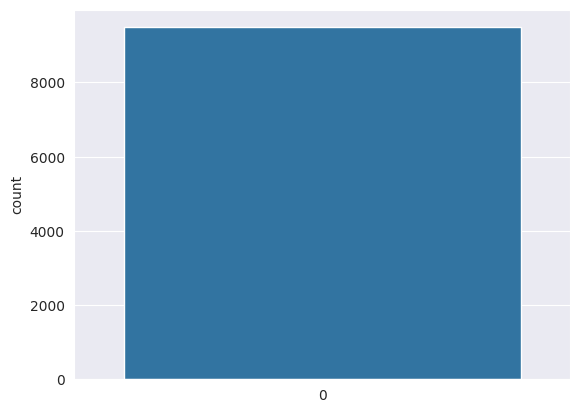

In [20]:
news_data['ID'] = pd.to_numeric(news_data['ID'], errors='coerce')
sns.set_style("darkgrid")
sns.countplot(news_data['ID'])


In [21]:
news_data.Age.count()

9488

In [22]:
news_data['text'] = news_data['Popularity'].astype(str) + " " + news_data['Gender']
news_data

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,text
0,Drake,NaN,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,95 male
1,Post Malone,NaN,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,86 male
2,Ed Sheeran,NaN,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,87 male
3,J Balvin,NaN,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,83 male
4,Bad Bunny,NaN,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,95 male
...,...,...,...,...,...,...,...,...,...
9483,IVAN$ITO,NaN,NaN,0,NaN,[],20,4249,NaN
9484,Antonello Venditti,NaN,male,71,IT,"[""canzone d'autore"", 'classic italian pop', 'i...",54,778642,54 male
9485,Lea Salonga,NaN,female,49,PH,"['movie tunes', 'tagalog worship']",56,179832,56 female
9486,Vertical Horizon,NaN,mixed,29,NaN,"['neo mellow', 'pop rock', 'post-grunge']",48,431277,48 mixed


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Mendefinisikan fungsi denoise_text untuk membersihkan teks
def denoise_text(text):
    # Fungsi untuk menghapus HTML tags
    def strip_html(text):
        soup = BeautifulSoup(str(text), "html.parser")
        return soup.get_text()

    # Fungsi untuk menghapus URL
    def remove_url(text):
        return re.sub(r'http\S+', '', str(text))

    # Fungsi untuk menghapus stopwords
    def remove_stopwords(text):
        final_text = []
        for word in str(text).split():
            if word.strip().lower() not in stwd:
                final_text.append(word.strip())
        return " ".join(final_text)

    # Logika pembersihan teks
    text = strip_html(text)
    text = remove_url(text)
    text = remove_stopwords(text)

    return text

# Mendefinisikan set stopwords
stwd = set(stopwords.words('english'))

# Mengaplikasikan fungsi denoise_text pada kolom 'Gender' dan menyimpan hasilnya di kolom 'ID'
news_data['ID'] = news_data['Gender'].apply(denoise_text)


In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.preprocessing import text, sequence
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:


stwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stwd.update(punctuation)



In [25]:
from bs4 import BeautifulSoup
import re
import math
# data cleaning
def strip_html(text):
    if isinstance(text, float) and math.isnan(text):
        return ""
    else:
        soup = BeautifulSoup(str(text), "html.parser")
        return soup.get_text()

#hapus square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#hapus URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)
#hapus stopwords dari text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stwd:
            final_text.append(i.strip())
    return " ".join(final_text)
#hapus noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news_data['text'] = news_data['text'].apply(denoise_text)


In [26]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news_data.text)
corpus[:10]

['95', 'male', '86', 'male', '87', 'male', '83', 'male', '95', 'male']

In [27]:
#jumlah kata yang sering ditemukan
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'male': 4253,
 'mixed': 2117,
 'female': 1453,
 '49': 212,
 '45': 209,
 '50': 202,
 '55': 198,
 '52': 197,
 '47': 195,
 '48': 190}

In [28]:


from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    cv = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_words = cv.transform(corpus)
    sum_words = bag_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



<Axes: >

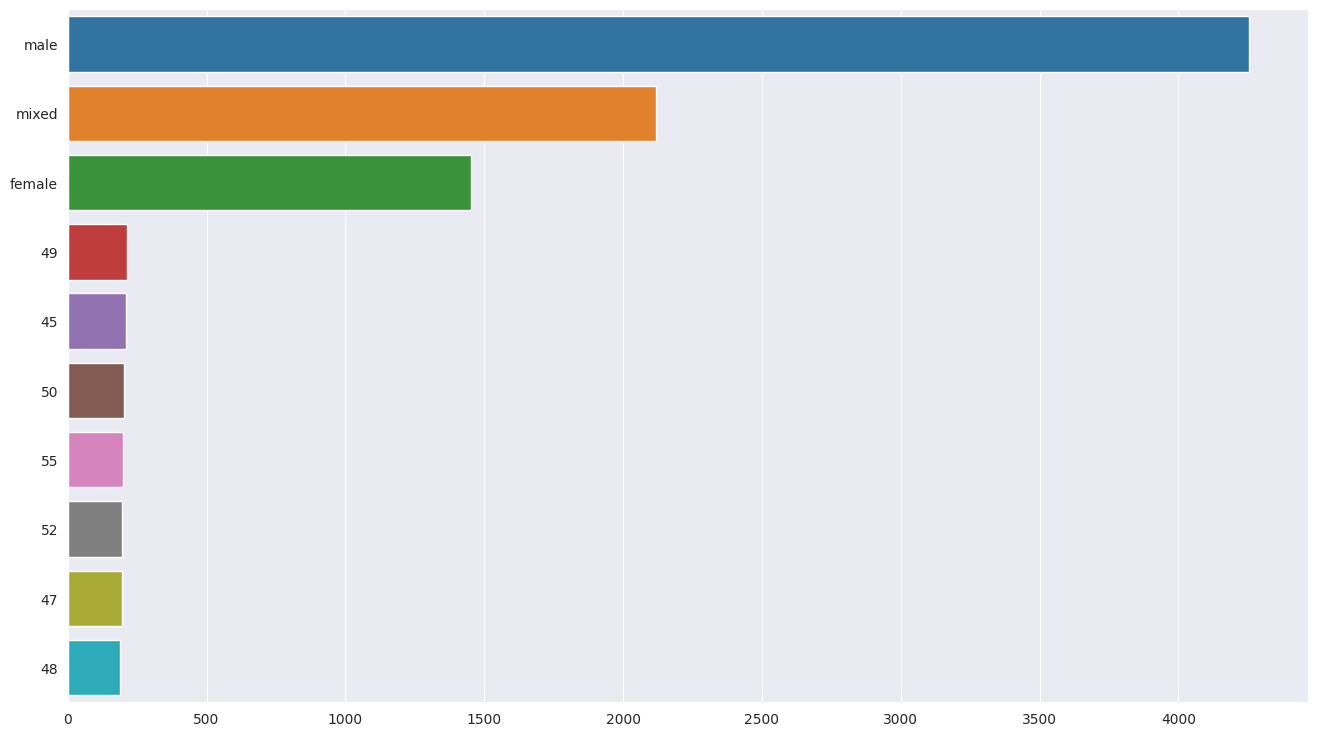

In [29]:
plt.figure(figsize = (16,9))
most_common = get_top_text_ngrams(news_data.text,10,1)
most_common = dict(most_common)
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))

In [30]:
Gender = pd.get_dummies(news_data.Gender)
new_cat = pd.concat([news_data, Gender], axis=1)
new_cat = new_cat.drop(columns='Gender')
new_cat.head(10)

,Name,ID,Age,Country,Genres,Popularity,Followers,text,female,male,mixed,other
0,Drake,NaN,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,95 male,0,1,0,0
1,Post Malone,NaN,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,86 male,0,1,0,0
2,Ed Sheeran,NaN,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,87 male,0,1,0,0
3,J Balvin,NaN,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,83 male,0,1,0,0
4,Bad Bunny,NaN,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,95 male,0,1,0,0
5,Justin Bieber,NaN,26,CA,"['canadian pop', 'pop']",88,75112165,88 male,0,1,0,0
6,Ozuna,NaN,28,PR,"['puerto rican pop', 'reggaeton', 'trap latino...",84,38192380,84 male,0,1,0,0
7,Ariana Grande,NaN,27,US,['pop'],88,95710972,88 female,1,0,0,0
8,Khalid,NaN,22,US,"['pop', 'pop r&b']",81,16282583,81 male,0,1,0,0
9,Daddy Yankee,NaN,43,PR,"['latin hip hop', 'reggaeton', 'trap latino', ...",84,34243502,84 male,0,1,0,0


In [31]:
news = new_cat['text'].values
label = new_cat[['female', 'male', 'mixed', 'other']].values


In [32]:
news

array(['95 male', '86 male', '87 male', ..., '56 female', '48 mixed',
       '21 male'], dtype=object)

In [33]:
label

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(news, label, test_size=0.2, shuffle=True)


In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [36]:
vocab_size = 10000
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
pad_train = pad_sequences(sequences_train, maxlen=max_len, truncating=trunc_type)
pad_test = pad_sequences(sequences_test, maxlen=max_len, truncating=trunc_type)

In [37]:
print(pad_test.shape)


(1898, 200)


In [39]:
pad_train

array([[ 0,  0,  0, ...,  0, 29,  3],
       [ 0,  0,  0, ...,  0, 30,  2],
       [ 0,  0,  0, ...,  0,  9,  2],
       ...,
       [ 0,  0,  0, ...,  0, 42,  2],
       [ 0,  0,  0, ...,  0,  8,  2],
       [ 0,  0,  0, ...,  0, 14,  3]], dtype=int32)

In [38]:
pad_test

array([[ 0,  0,  0, ...,  0, 40,  2],
       [ 0,  0,  0, ...,  0,  7,  2],
       [ 0,  0,  0, ...,  0, 28,  2],
       ...,
       [ 0,  0,  0, ...,  0, 12,  3],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 11,  3]], dtype=int32)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 200, 128)          98816     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 797060 (3.04 MB)
Trainable params: 797060 

In [41]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93:
            self.model.stop_training = True
            print("\nAkurasi dari training set dan validation set telah terpenuhi > 93!")

callbacks = myCallback()

In [42]:
num_epochs = 50
history = model.fit(pad_train, y_train, epochs=num_epochs,
                    validation_data=(pad_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
238/238 - 117s - loss: 0.7993 - accuracy: 0.4974 - val_loss: 0.2874 - val_accuracy: 0.6048 - 117s/epoch - 492ms/step
Epoch 2/50
238/238 - 111s - loss: 0.6177 - accuracy: 0.6331 - val_loss: 0.2882 - val_accuracy: 0.6048 - 111s/epoch - 465ms/step
Epoch 3/50
238/238 - 115s - loss: 0.3619 - accuracy: 0.7167 - val_loss: 0.0473 - val_accuracy: 0.9984 - 115s/epoch - 483ms/step
Epoch 4/50
238/238 - 113s - loss: 0.0371 - accuracy: 0.8644 - val_loss: 0.0265 - val_accuracy: 0.8235 - 113s/epoch - 475ms/step
Epoch 5/50
238/238 - 112s - loss: 0.0215 - accuracy: 0.8673 - val_loss: 0.0271 - val_accuracy: 0.9984 - 112s/epoch - 470ms/step
Epoch 6/50
238/238 - 122s - loss: 0.0201 - accuracy: 0.8686 - val_loss: 0.0234 - val_accuracy: 0.8235 - 122s/epoch - 512ms/step
Epoch 7/50
238/238 - 110s - loss: 0.0160 - accuracy: 0.8679 - val_loss: 0.0375 - val_accuracy: 0.9984 - 110s/epoch - 462ms/step
Epoch 8/50
238/238 - 112s - loss: 0.0135 - accuracy: 0.8696 - val_loss: 0.0219 - val_accuracy: 0.9984 - 

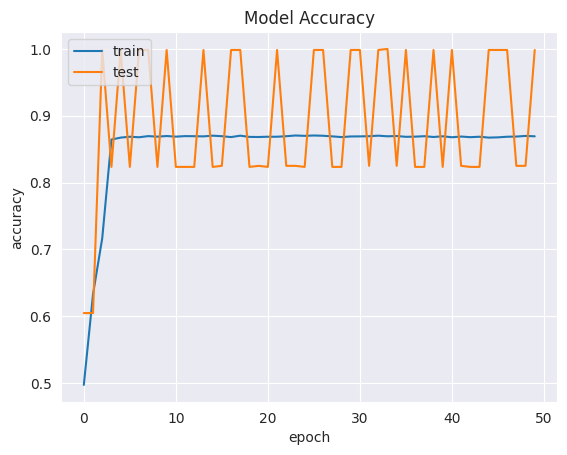

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

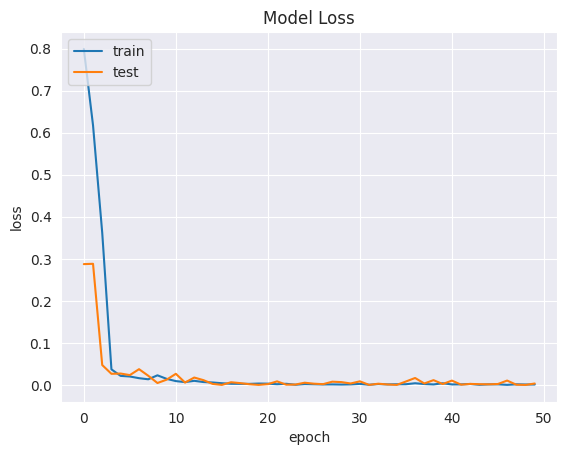

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

if train_accuracy >= 0.86 and val_accuracy >= 0.86:
    print("Model memenuhi syarat akurasi minimal.")
else:
    print("Model tidak memenuhi syarat akurasi minimal.")


Model memenuhi syarat akurasi minimal.
